In [1]:
import torch
import torch.nn as nn
import json
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from configs.dataloaders import create_data_loaders
from runner_static import static_training
from runner_dynamic import dynamic_training

# Static Model

In [2]:
# Initialize random seed
seed = 30026
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

# Define data of the problem
num_classes = 15
num_timesteps = 5
num_features = 34

# Decide whever to be verbose with display outputs and set device
verbose = True
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# Define hyperparameters
with open('hyperparameters.json', 'r') as file:
    params = json.load(file)

static_params = params["static_model"]
dynamic_params = params["dynamic_model"]

# Load file
data = pd.read_csv(params["file_path"])

In [4]:
# Split dataset in train and test sets keeping balance for the static label localization
data_train, data_test = train_test_split(data, test_size=params["test_size"], random_state=seed, stratify = data['static_localization'])

# Create dataloaders
dataloader_train, dataloader_test = create_data_loaders(data_train, data_test, params["batch_size"])

Epoch [1/4],	Training Loss: 2.0963, Training accuracy: 32.17,	Test Loss: 1.6890, Test Accuracy: 42.60,	Learning rate: 0.00100
Epoch [2/4],	Training Loss: 1.6436, Training accuracy: 46.74,	Test Loss: 1.4955, Test Accuracy: 47.81,	Learning rate: 0.00100
Epoch [3/4],	Training Loss: 1.4663, Training accuracy: 52.87,	Test Loss: 1.4058, Test Accuracy: 52.89,	Learning rate: 0.00100
Epoch [4/4],	Training Loss: 1.3676, Training accuracy: 55.41,	Test Loss: 1.3642, Test Accuracy: 55.01,	Learning rate: 0.00100


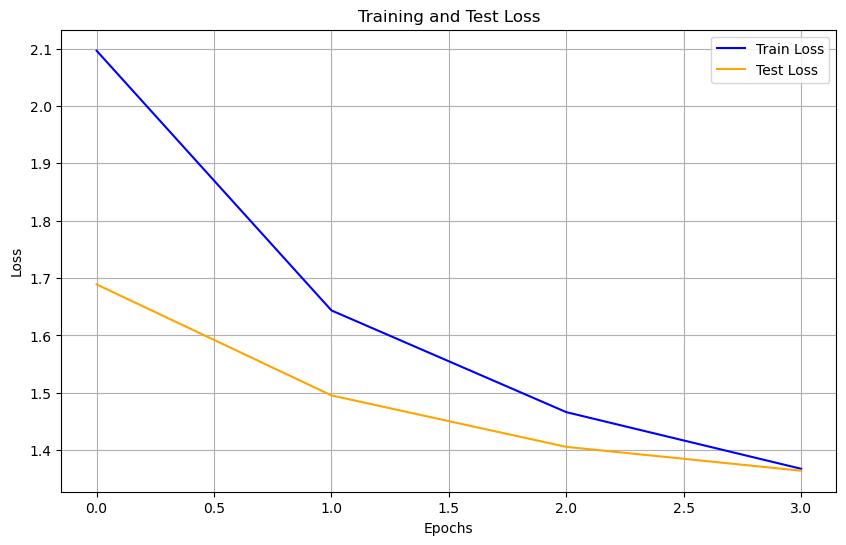

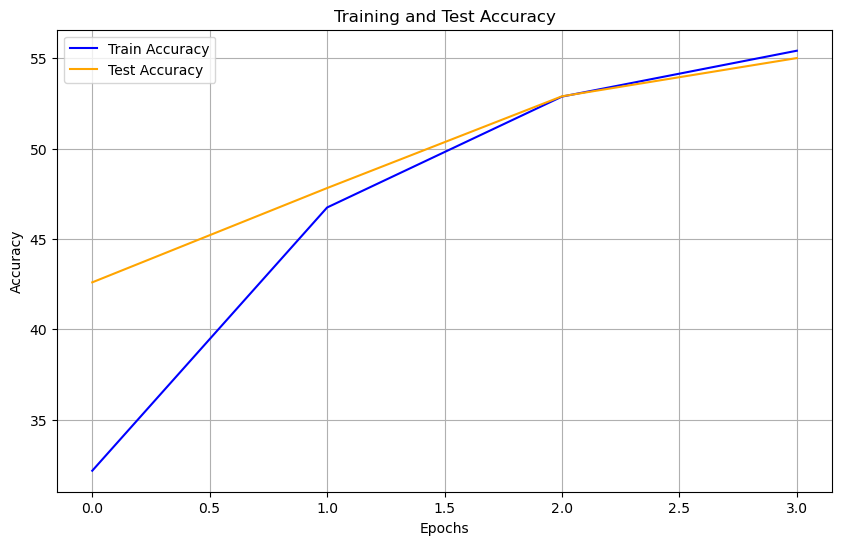

In [5]:
train_loss, train_accuracy, test_loss, test_accuracy, static_model = static_training(num_classes, static_params, dataloader_train, dataloader_test, verbose, device, seed)

In [ ]:
train_loss, train_accuracy, test_loss, test_accuracy, dynamic_model = dynamic_training(num_features, num_classes, num_timesteps, dynamic_params, static_model, dataloader_train, dataloader_test, verbose, device, seed)